In [19]:
from google.colab import auth
auth.authenticate_user()
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [20]:
!pwd
# !cd /content/

/content/darknet


In [3]:
ls -la "gdrive/My Drive/University/Motorbike-yolov3/"

total 1114340
drwx------ 2 root root      4096 Nov  1 10:20  1612899-Lab02/
drwx------ 2 root root      4096 Oct 30 16:22  backup/
-rw------- 1 root root       151 Nov  1 10:16 'BTCN-02: THIẾT KẾ HỆ THỐNG PHẦN MỀM DỰA VÀO THÔNG TIN ẢNH.gdoc'
drwx------ 2 root root      4096 Oct 29 02:14  configFile/
-rw------- 1 root root 432811879 Oct 29 02:16  cudnn-10.0-linux-x64-v7.5.0.56.tgz
-rw------- 1 root root     28118 Oct 31 16:30  detector.c
-rw------- 1 root root      3040 Oct 31 03:52  Makefile
-rw------- 1 root root 246391548 Oct 31 16:42  motorbike-yolov3_2200.weights
-rw------- 1 root root 246391548 Nov  1 01:02  motorbike-yolov3_3000.weights
-rw------- 1 root root 215412916 Oct 30 15:44  output.tar.xz
-rw------- 1 root root      3071 Oct 30 15:43  test.txt
-rw------- 1 root root     27854 Oct 30 15:43  train.txt


In [ ]:
# This cell can be commented once you checked the current CUDA version
# CUDA: Let's check that Nvidia CUDA is already pre-installed and which version is it. In some time from now maybe you 
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2018 NVIDIA Corporation
Built on Sat_Aug_25_21:08:01_CDT_2018
Cuda compilation tools, release 10.0, V10.0.130


In [ ]:
!tar -xzvf gdrive/My\ Drive/University/Motorbike-yolov3/cudnn-10.0-linux-x64-v7.5.0.56.tgz -C /usr/local/

cuda/include/cudnn.h
cuda/NVIDIA_SLA_cuDNN_Support.txt
cuda/lib64/libcudnn.so
cuda/lib64/libcudnn.so.7
cuda/lib64/libcudnn.so.7.5.0
cuda/lib64/libcudnn_static.a


In [ ]:
# We're unzipping the cuDNN files from your Drive folder directly to the VM CUDA folders
!chmod a+r /usr/local/cuda/include/cudnn.h

# Now we check the version we already installed. Can comment this line on future runs
!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2

chmod: cannot access '/usr/local/cuda/include/cudnn.h': No such file or directory
cat: /usr/local/cuda/include/cudnn.h: No such file or directory


In [ ]:
%cd /content/

/content


In [ ]:
!rm -rf darknet

In [4]:
# Leave this code uncommented on the very first run of your notebook or if you ever need to recompile darknet again.
# Comment this code on the future runs.
!git clone https://github.com/pjreddie/darknet
%cd darknet

# Check the folder
!ls

Cloning into 'darknet'...
remote: Enumerating objects: 5901, done.
remote: Total 5901 (delta 0), reused 0 (delta 0), pack-reused 5901
Receiving objects: 100% (5901/5901), 6.16 MiB | 21.04 MiB/s, done.
Resolving deltas: 100% (3916/3916), done.
/content/darknet
cfg	  include	LICENSE.gen   LICENSE.mit  python     src
data	  LICENSE	LICENSE.gpl   LICENSE.v1   README.md
examples  LICENSE.fuck	LICENSE.meta  Makefile	   scripts


Compile Darknet
- Remember check Makefile is GPU before
- Copy make (modified and uploaded) from drive to darknet

In [5]:
!cp -v /content/gdrive/My\ Drive/University/Motorbike-yolov3/Makefile /content/darknet/
!cp -v /content/gdrive/My\ Drive/University/Motorbike-yolov3/detector.c ./examples/

'/content/gdrive/My Drive/University/Motorbike-yolov3/Makefile' -> '/content/darknet/Makefile'
'/content/gdrive/My Drive/University/Motorbike-yolov3/detector.c' -> './examples/detector.c'


In [6]:
!make

mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DOPENCV -DGPU -c ./src/gemm.c -o obj/gemm.o
./src/gemm.c: In function ‘time_gpu’:
./src/gemm.c:232:9: warning: ‘cudaThreadSynchronize’ is deprecated [-Wdeprecated-declarations]
         cudaThreadSynchronize();
         ^~~~~~~~~~~~~~~~~~~~~
In file included from /usr/local/cuda/include/cuda_runtime.h:96:0,
                 from include/darknet.h:11,
                 from ./src/utils.h:5,
                 from ./src/gemm.c:2:
/usr/local/cuda/include/cuda_runtime_api.h:947:57: note: declared here
 extern __CUDA_DEPRECATED __host__ cudaError_t CUDARTAPI cudaThreadSynchronize(void);
                                                         ^~~~~~~~~~~~~~~~~~~~~
gcc -Iinclude/ -Isrc/ -DOPENCV `pkg-config --cflags opencv`  -DGPU -I/usr/local/cuda/include/ -Wall -Wno-unused-result 

#### Check result install yolo

In [ ]:
#download files
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
  
  
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)
def download(path):
  from google.colab import files
  files.download(path)

In [8]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2019-11-01 17:14:52--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  67.2MB/s    in 3.7s    

2019-11-01 17:14:56 (63.5 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
!pwd

/content/darknet


In [ ]:
# !chmod +x darknet
!chmod 777 darknet
# chmod 755 /bin
# chmod 755 /lib

In [10]:
# Not necessary cell
# Execute darknet using YOLOv3 model with pre-trained weights to detect objects on 'person.jpg'
!./darknet detect cfg/yolov3.cfg yolov3.weights data/giraffe.jpg

# Show the result using the helper imgShow()
imShow('predictions.jpg')

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

In [ ]:
# don't go beyond here with Run All
#assert False

In [11]:
# Copy file config to folder
!mkdir configFile
!cp -r /content/gdrive/My\ Drive/University/Motorbike-yolov3/configFile/. ./configFile
!ls

backup	    examples	   LICENSE.fuck  LICENSE.v1	  README.md
cfg	    include	   LICENSE.gen	 Makefile	  results
configFile  libdarknet.a   LICENSE.gpl	 obj		  scripts
darknet     libdarknet.so  LICENSE.meta  predictions.jpg  src
data	    LICENSE	   LICENSE.mit	 python		  yolov3.weights


In [12]:
!cp -r /content/gdrive/My\ Drive/University/Motorbike-yolov3/train.txt ./
!cp -r /content/gdrive/My\ Drive/University/Motorbike-yolov3/test.txt ./
!cp -r /content/gdrive/My\ Drive/University/Motorbike-yolov3/output.tar.xz ./

!ls

backup	    include	   LICENSE.gpl	 output.tar.xz	  src
cfg	    libdarknet.a   LICENSE.meta  predictions.jpg  test.txt
configFile  libdarknet.so  LICENSE.mit	 python		  train.txt
darknet     LICENSE	   LICENSE.v1	 README.md	  yolov3.weights
data	    LICENSE.fuck   Makefile	 results
examples    LICENSE.gen    obj		 scripts


In [ ]:
# Uncompress zipped file
!tar xf ./output.tar.xz

In [ ]:
# OR Create confiFile folder
#!mkdir configFile
# Upload manually your custom config file to here. or copy from google drive by command

### Training

In [14]:
!wget https://pjreddie.com/media/files/darknet53.conv.74


--2019-11-01 17:19:38--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  44.6MB/s    in 3.6s    

2019-11-01 17:19:42 (42.5 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



#### For trainning from start

In [ ]:
#!./darknet detector train configFile/motorbike-obj.data configFile/motorbike-yolov3-tiny.cfg darknet53.conv.74
!./darknet detector train configFile/motorbike-obj.data configFile/motorbike-yolov3.cfg darknet53.conv.74

motorbike-yolov3
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8      

#### For trainning from backup file

In [ ]:
!cat /content/gdrive/My\ Drive/University/Motorbike-yolov3/motorbike-yolov3.backup

cat: '/content/gdrive/My Drive/University/Motorbike-yolov3/motorbike-yolov3.backup': No such file or directory


In [ ]:
# Copy backup from drive to current directory
!cp -v  /content/gdrive/My\ Drive/University/Motorbike-yolov3/motorbike-yolov3.backup /content/darknet/backup/

cp: cannot stat '/content/gdrive/My Drive/University/Motorbike-yolov3/motorbike-yolov3.backup': No such file or directory


In [ ]:
!./darknet detector train configFile/motorbike-obj.data configFile/motorbike-yolov3.cfg backup/motorbike-yolov3.backup

#### Show result

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

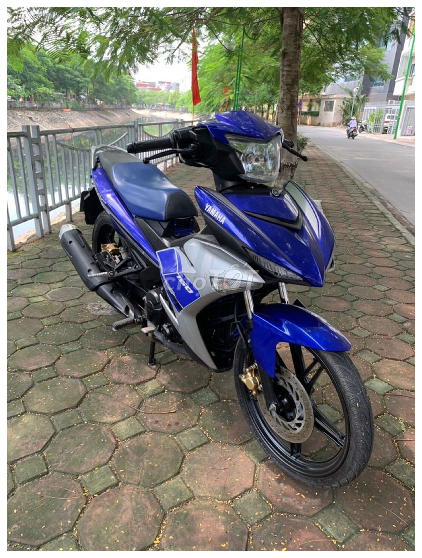

In [ ]:
!./darknet detector test \
        configFile/motorbike-obj.data  \
        configFile/motorbike-yolov3.cfg \
        backup/motorbike-yolov3_2300.weights \
        Exciter-test02.jpg

imShow('predictions.jpg')

In [ ]:
# Detect test image on your machine or depend
!./darknet detector test \
        configFile/motorbike-obj.data  \
        configFile/motorbike-yolov3.cfg \
        backup/motorbike-yolov3_2300.weights \
       output/Wave-0200.jpg
# Show the result using the helper imgShow()
imShow('predictions.jpg')

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

In [ ]:
## Copy file to my drive
!cp -v /content/darknet/backup/motorbike-yolov3.backup           /content/gdrive/My\ Drive/University/Motorbike-yolov3/backup
# Change number weights
!cp -v /content/darknet/backup/motorbike-yolov3_3000.weights     /content/gdrive/My\ Drive/University/Motorbike-yolov3
# !rm -rf backup
# !mkdir backup

'/content/darknet/backup/motorbike-yolov3.backup' -> '/content/gdrive/My Drive/University/Motorbike-yolov3/backup/motorbike-yolov3.backup'
'/content/darknet/backup/motorbike-yolov3_3000.weights' -> '/content/gdrive/My Drive/University/Motorbike-yolov3/motorbike-yolov3_3000.weights'


In [ ]:
!cp -r /content/darknet/.  /content/gdrive/My\ Drive/University/Motorbike-yolov3/1612899-Lab02/Programs